## Tidal Pattern in Grand-Pierre Bay to inform Satellite Image 

In [1]:
import datetime as datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import ttide.t_tide as t_tide
import sklearn
import math

In [5]:
df = pd.read_csv('../Datasets/h799a.csv',header=None)
df = df.drop(df[df[4] == -32767].index)
df

,0,1,2,3,4
0,2011,11,30,21,812
1,2011,11,30,22,717
2,2011,11,30,23,656
3,2011,12,1,0,661
4,2011,12,1,1,720
...,...,...,...,...,...
62110,2018,12,31,19,957
62111,2018,12,31,20,1003
62112,2018,12,31,21,1000
62113,2018,12,31,22,946


In [6]:
def makedate(row):
    a = datetime.datetime(row[0], row[1], row[2], row[3])
    return a

In [7]:
df['Dates'] = df.apply(lambda row: makedate(row), axis=1)
df = df.rename(columns={4: "Sea Level"})
df['Sea Level'] = df['Sea Level'] / 1000 # Converting from mm to m

In [8]:
years = [2012,2013,2014,2015,2016,2017,2018]
masks = [pd.DatetimeIndex(df['Dates']).year == yr for yr in years]
df_yrs = [(df.loc[mask]).reset_index(drop=True) for mask in masks]

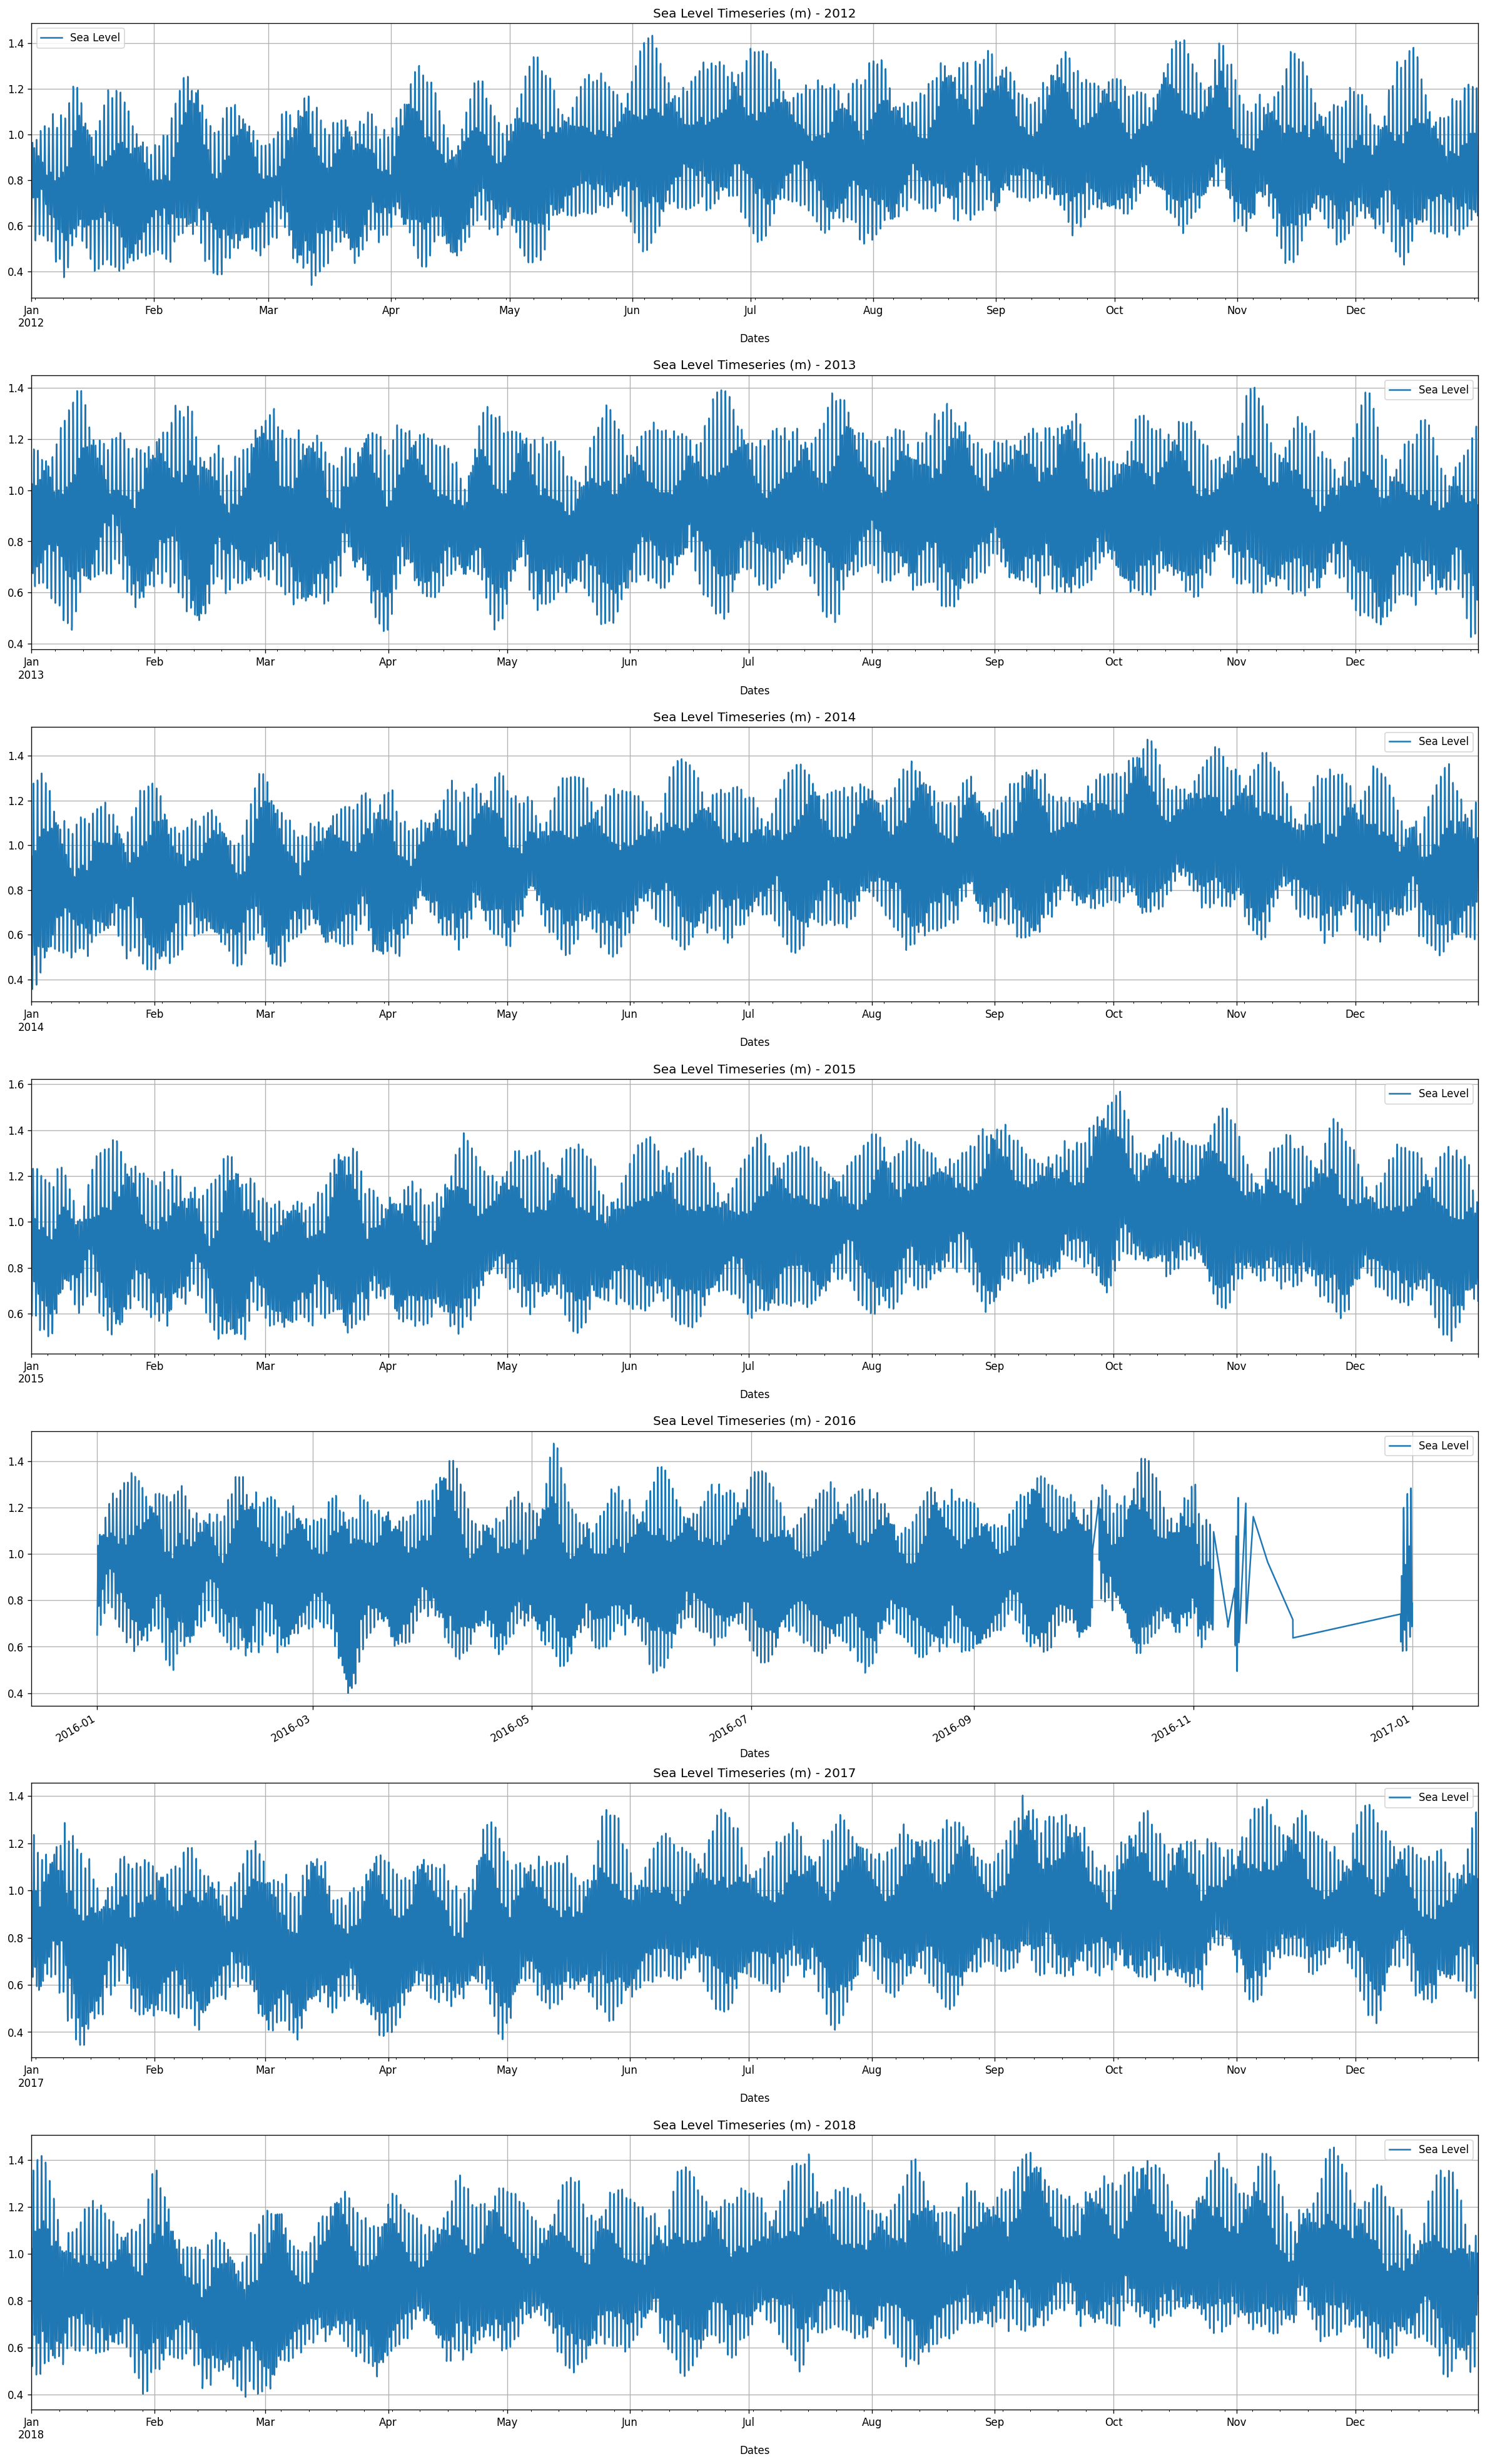

In [9]:
fig, axs = plt.subplots(7,1, figsize=(20,40), dpi=120)
plt.tight_layout(w_pad=0, h_pad=7)
for i,df in enumerate(df_yrs):
    df.plot('Dates', 'Sea Level', title='Sea Level Timeseries (m) - ' + str(years[i]), ax=axs[i])
    axs[i].grid()

## Finding Dates of Minimum Tide Level for the Year

In [38]:
for df in df_yrs:
    mins = df['Sea Level'].min()
    date_of_min = df.loc[df['Sea Level'] == mins]
    print(date_of_min['Dates'].values)

['2012-03-11T21:00:00.000000000']
['2013-12-30T04:00:00.000000000']
['2014-01-01T06:00:00.000000000']
['2015-12-25T06:00:00.000000000']
['2016-03-10T20:00:00.000000000']
['2017-01-13T07:00:00.000000000' '2017-01-14T07:00:00.000000000']
['2018-02-24T01:00:00.000000000']
